# Chapter 03: Processing Images with OpenCV

In [1]:
## Import libraries

import cv2
import matplotlib.pyplot as plt
import numpy as np
import scipy

## Converting images between different color models

We will be working with three kinds of color models:

*   **Grayscale** is a model that reduces color information by translating it into shades
of gray or brightness. 

*   **BGR** is the blue-green-red color model, in which each pixel has a triplet of values
representing the blue, green, and red components or channels of the pixel's color.

*   **HSV** model uses a different triplet of channels. Hue is the color's tone,
saturation is its intensity, and value represents its brightness.

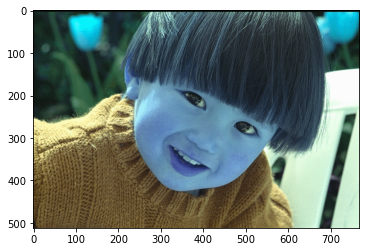

In [2]:
# Default BGR image
img = cv2.imread('./Images/child.bmp')
plt.imshow(img)

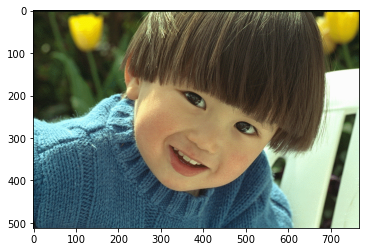

In [3]:
# convert BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

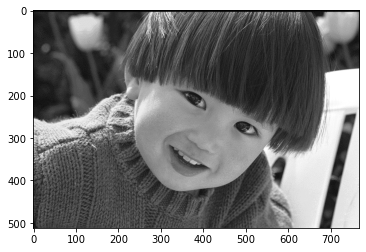

In [4]:
# convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')

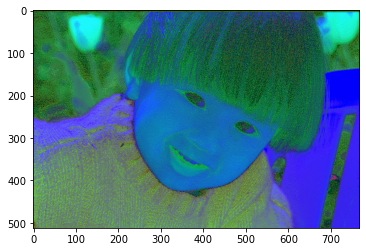

In [5]:
# convert to HSV
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(img_hsv)

## Exploring the Fourier transform

The Fourier transform allows us to identify regions in images where a signal (such as the values of image pixels) changes a lot, and also regions where the change is less dramatic.

*   The Fourier transform gives information about the frequency content of the image.
    *  It is used to decompose an image into its sine and cosine components.<br>
    <br>
*   It can be used for image enhancement, analysis, restoration, compression, edge detection, and shape detection.

**Steps**

1.  Read the image as a gray scale: `i = cv2.imread(image path, 0)`

2.  Convert the image to float: `img_f = np.float32(i)`

3.  Apply Discrete Fourier Transform: `dft = cv2.dft(img_f, cv2.DFT_COMPLEX_OUTPUT)`
    *   It returns complex output (real numbers, imaginary numbers)<br>
        <br>
4.  Shift the lightness of the image to the center of the image: `dft_shift = np.fft.fftshift(dft)`

5.  Compute the amount of change: `res = 20*np.log(cv2.magnitude(dft_shift[:,:],dft_shift[:,:]))`
    * The function `cv2.magnitude()` calculates the magnitude of the `dft_shift` real vector and imaginary vector.

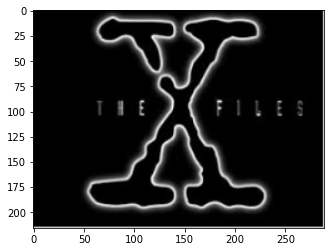

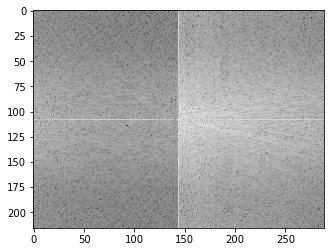

In [6]:
i = cv2.imread('./Images/x.PNG', 0) # 0 means read as grayscale

# Convert the image into float 32 data type
img_f = np.float32(i)

# Apply Discrete Fourier Transform (DFT), return complex output (real numbers, imaginary numbers)
dft = cv2.dft(img_f, cv2.DFT_COMPLEX_OUTPUT)

# Shift the lightness to the center of the image
dft_shift = np.fft.fftshift(dft)

# Compute the magnitude (amount) of change of the real numbers vector and the imaginary numbers vector
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:],dft_shift[:,:]))

# Display the result
plt.imshow(i, cmap='gray')
plt.show()

plt.imshow(magnitude_spectrum, cmap='gray')
plt.show()

## Applying Filters

### Convolution operation

![convolution operation](./data/2D_Convolution_Animation.gif)

src: https://commons.wikimedia.org/wiki/File:2D_Convolution_Animation.gif


### Apply Low-Pass Filter

LPF is the type of frequency domain filter that is used for smoothing the image. It attenuates the high frequency components and preserves the low frequency components.

One of the most popular blurring/smoothening filters, the Gaussian blur, is a low-pass filter that
attenuates the intensity of high-frequency signals.

**Steps**
1.  Apply Gaussian blur to the image: `cv2.GaussianBlur(image, kernel size, deviation of the filter)`

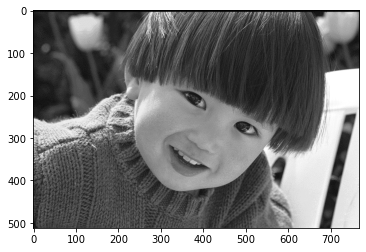

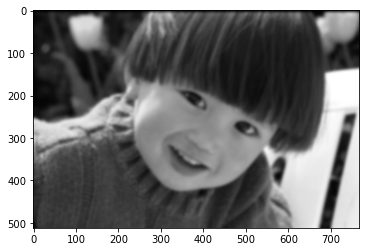

In [7]:
img = cv2.imread('./Images/child.bmp', 0)
# Apply Gaussina blur (image, filter size, deviation of filter in x-axis (sigma x))
img_lpf = cv2.GaussianBlur(img, (17, 17), 0)

plt.imshow(img, cmap='gray')
plt.show()

plt.imshow(img_lpf, cmap='gray')
plt.show()

### Applying High Pass Filter

HPF is the type of frequency domain filter that is used for sharpening the image. It attenuates the low frequency components and preserves the high frequency components.


HPF-image can be generated by subtracting a gaussian blurred image (low-pass filtered image) from the original image.

**Steps**
1.  Subtract LP filtered image from the original image: `img_hpf = img - cv2.GaussianBlur(img, (17, 17), 0)`

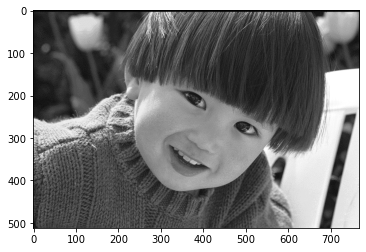

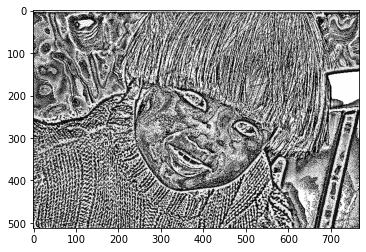

In [8]:
img_hpf = img - cv2.GaussianBlur(img, (17, 17), 0)

plt.imshow(img, cmap='gray')
plt.show()

plt.imshow(img_hpf, cmap='gray')
plt.show()

### High-pass filtered image + low-pass filtered image

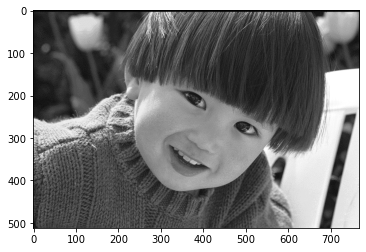

In [9]:
org = img_hpf + img_lpf
plt.imshow(org, cmap='gray')

### Applying High-boost Filter

The high boost filter is used to enhance the high frequency components without eliminating low frequency components..

For a 3x3 kernel, the high-boost filter is

|    |    |    |
|----|----|----|
| -1 | -1 | -1 |
| -1 | 8  | -1 |
| 1  | -1 | -1 |


For a 5x5 kernel

|    |    |    |    |    |
|----|----|----|----|----|
| -1 | -1 | -1 | -1 | -1 |
| -1 | 1  | 2  | 1  | -1 |
| -1 | 2  | 4  | 2  | -1 |
| -1 | 1  | 2  | 1  | -1 |
| -1 | -1 | -1 | -1 | -1 |

**Steps**

1.  Read the image.

2.  Define the kernel:
    * For 3*3 kernel:
            $\left[\begin{array}{ccc}
                -1 & -1 & -1\\
                -1 & 8 & -1\\
                -1 & -1 & -1
                \end{array}\right]$
    
    * For 5*5 kernel:
            $\left[\begin{array}{ccc}
                -1 & -1 & -1 & -1 & -1\\,
                -1 & 1 & 2 & 1 & -1 \\,
                -1 & 2 & 4 & 2 & -1\\,
                -1 & 1 & 2 & 1 & -1\\,
                -1 & -1 & -1 & -1 & -1 
                \end{array}\right]$

3. Apply the filter to the image using `convolve` function in scipy:  
    *   `img_k3 = ndimage.convolve(img, k3)`
    *   `img_k5 = ndimage.convolve(img, k5)`

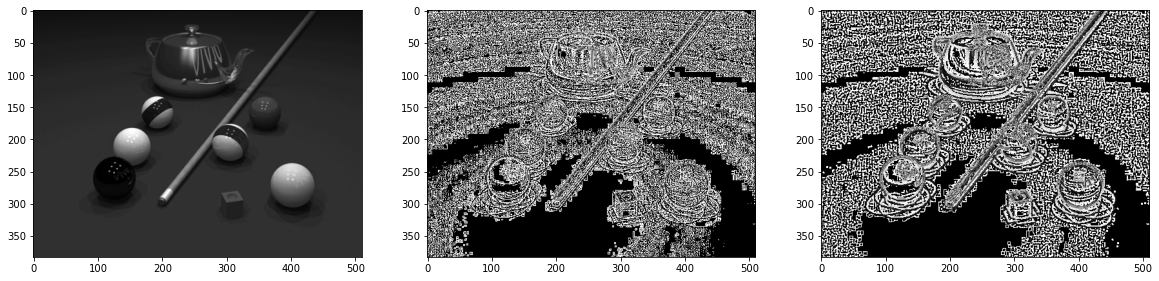

In [113]:
from scipy import ndimage
k3 = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]    
])

k5 = np.array([
    [-1, -1, -1, -1, -1],
    [-1, 1, 2, 1, -1],
    [-1, 2, 4, 2, -1],
    [-1, 1, 2, 1, -1],
    [-1, -1, -1, -1, -1]
])

img = cv2.imread('./Images/pool.png', 0) # read as grayscale image

img_k3 = ndimage.convolve(img, k3)
img_k5 = ndimage.convolve(img, k5)

plt.figure(figsize=(20, 20))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')

plt.subplot(1, 3, 2)
plt.imshow(img_k3, cmap='gray')

plt.subplot(1, 3, 3)
plt.imshow(img_k5, cmap='gray')

We can use `cv2.filter2D` to apply filters to images.

`filter2D (src, ddepth, kernel)`

`Ddepth` – Depth of the output image (Depth is the "precision" of each pixel. Typically it can be 8/24/32 bit for displaying) [ -1 will give the output image depth as same as the input image]

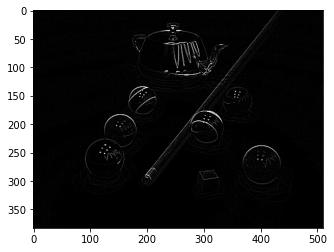

In [117]:
kernel = np.array([ #edge detection
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
])

new = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)
plt.imshow(new, cmap='gray')

In [ ]:
# img = cv2.imread('./Images/cat.PNG', 0)
# kernel = np.array([ #edge detection
#     [-1, -1, -1],
#     [-1, 9, -1],
#     [-1, -1, -1]
# ])
# x = img.copy()

# new = cv2.filter2D(x, ddepth=-1, kernel=cv2.flip(kernel,-1))

# new_1 = ndimage.convolve(x, kernel)

# print(new)
# print(new_1)
# plt.imshow(new, cmap='gray')
# plt.show()
# plt.imshow(new_1, cmap='gray')
# plt.show()

## Edge detection

*   Let's imagine we want to detect the edges present in the image. For instance:

![Image](./data/edge.jpg)

*   You can easily notice that in an edge, the pixel intensity changes in a notorious way. 

*   A good way to express changes is by using derivatives. A high change in gradient indicates a major change in the image.

*   Let's assume we have a 1D-image. An edge is shown by the "jump" in intensity in the plot below:

![Image](./data/edg1.jpg)

*   The edge "jump" can be seen more easily if we take the ***first derivative***.

![Image](./data/edg2.jpg)

### Sobel Operator

*   Horizontal edge detection

$\left[\begin{array}{ccc}
-1 & 0 & +1\\
-2 & 0 & +2\\
-1 & 0 & +1 \\
\end{array}\right]$

*   Vertical edge detection 

$\left[\begin{array}{ccc}
-1 & -2 & -1\\
0 & 0 & 0\\
+1 & +2 & +1 \\
\end{array}\right]$

**Steps**

1.  Read the image as gray scale.

2.  Apply Sobel filter: `cv2.Soble(src image, ddepth, x_order, y_order, kernel size)`

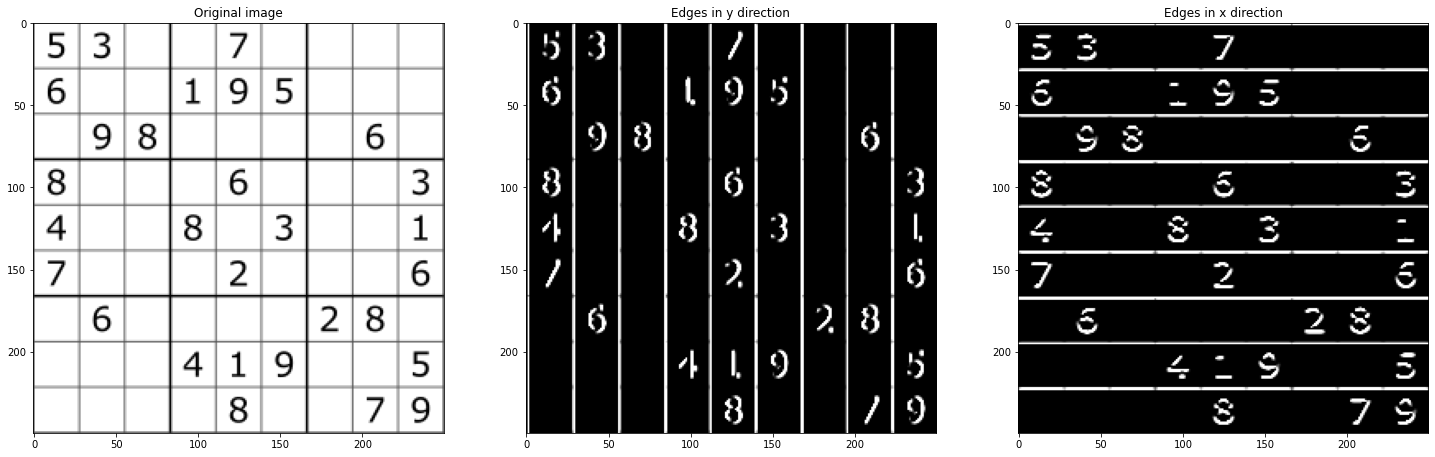

In [12]:
img = cv2.imread('./Images/sudoku.png', 0)
img_edg_y = cv2.Sobel(img, -1, 1, 0, (7, 7))
img_edg_x = cv2.Sobel(img, -1, 0, 1, (7, 7))

plt.figure(figsize=(25, 25))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Original image")

plt.subplot(1, 3, 2)
plt.imshow(img_edg_y, cmap='gray')
plt.title("Edges in y direction")

plt.subplot(1, 3, 3)
plt.imshow(img_edg_x, cmap='gray')
plt.title("Edges in x direction")

plt.show()

### Laplacian Operator

*   Laplacian operator applies the second derivative to images to detect edges.

![](./data/edg3.jpg)

**Steps**

1.  Read the image as gray scale

2.  Apply the Laplacian filter: `cv2.Laplacian(src_gray, ddepth, ksize=kernel_size)`

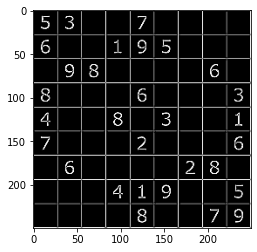

In [13]:
img_edg_x_y = cv2.Laplacian(img, -1, (7, 7))
plt.imshow(img_edg_x_y, cmap='gray')

It is recommended to blur the image before detecting edges to avoid detecting noise.

**Steps**

1.  Read the image as gray scale: `img = cv2.imread(image path, 0)`

2.  Apply median blur filter: `img_blur = cv2.medianBlur(img, ksize)`

3.  Apply Sobel filter in x, y, x and y direction: 
    *   `img_blur_soble = cv2.Sobel(img_blur, -1, 1, 1, (7, 7))`
    *   `img_blur_soble_x = cv2.Sobel(img_blur, -1, 1, 0, (7, 7))`
    *   `img_blur_soble_y = cv2.Sobel(img_blur, -1, 0, 1, (7, 7))` <br>
    <br>

4.  Apply Laplacian filter: `img_blur_lap = cv2.Laplacian(img_blur, -1, (7, 7))`

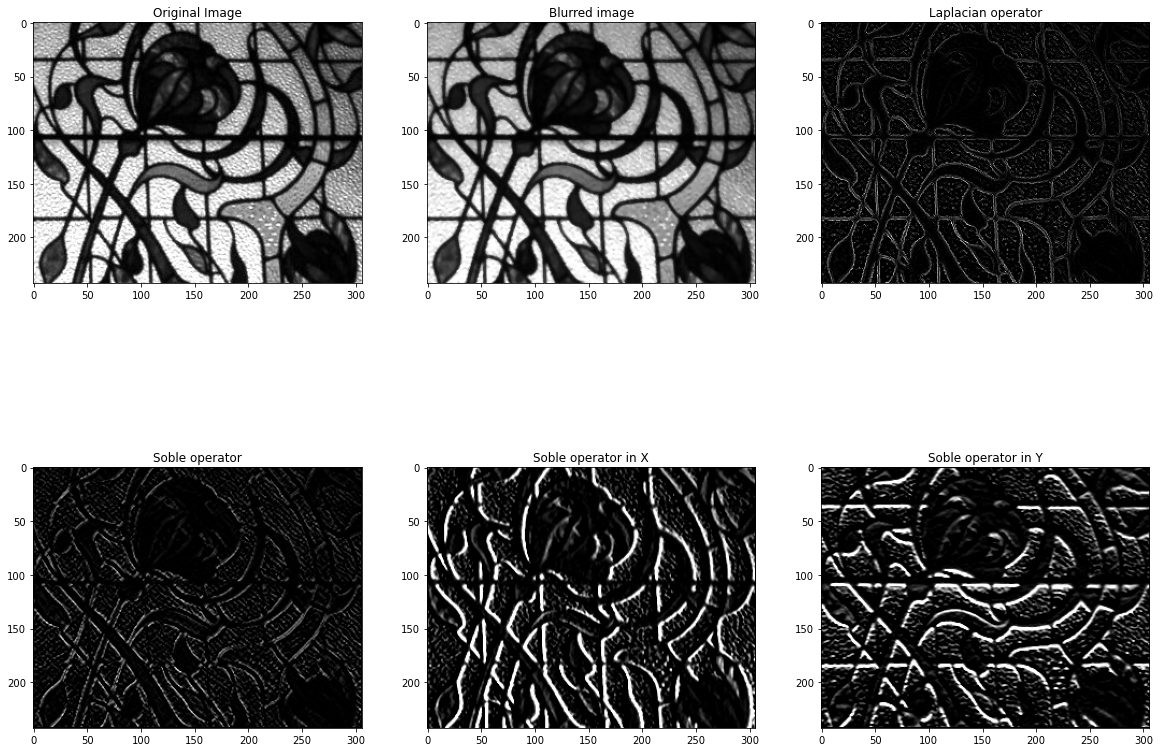

In [14]:
img = cv2.imread('./Images/windows.jpg', 0)

# Blur the image using median blur filter
img_blur = cv2.medianBlur(img, ksize=3)

# apply Soble filter in x and y direction
img_blur_soble = cv2.Sobel(img_blur, -1, 1, 1, (7, 7))

# apply Soble in x direction
img_blur_soble_x = cv2.Sobel(img_blur, -1, 1, 0, (7, 7))

# apply Soble in y direction
img_blur_soble_y = cv2.Sobel(img_blur, -1, 0, 1, (7, 7))

# apply Laplacian
img_blur_lap = cv2.Laplacian(img_blur, -1, (7, 7))

# display the images
plt.figure(figsize=(20, 15))

plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 3, 2)
plt.imshow(img_blur, cmap='gray')
plt.title("Blurred image")


plt.subplot(2, 3, 3)
plt.imshow(img_blur_lap, cmap='gray')
plt.title("Laplacian operator")


plt.subplot(2, 3, 4)
plt.imshow(img_blur_soble, cmap='gray')
plt.title("Soble operator")

plt.subplot(2, 3, 5)
plt.imshow(img_blur_soble_x, cmap='gray')
plt.title("Soble operator in X")

plt.subplot(2, 3, 6)
plt.imshow(img_blur_soble_y, cmap='gray')
plt.title("Soble operator in Y")

plt.show()

### Canny edge detection

The Canny edge detection algorithm is a five-step process:

1. Denoise the image with a Gaussian filter.

2. Calculate the gradients.

3. Apply non-maximum suppression (NMS) on the edges. Basically, this means that the algorithm selects the best edges from a set of overlapping edges.

4. Apply a double threshold to all the detected edges to eliminate any false positives.

5. Analyze all the edges and their connection to each other to keep the real edges and discard the weak ones.

`cv2.Canny(image, threshold1, threshold2, apertureSize, L2gradient)`
1.  `image`: Source/Input image of n-dimensional array.

2.  `threshold1`: It is the low threshold value of intensity gradient.

3.  `threshold2`: It is the high threshold value of intensity gradient.

**Optional parameters are:**

4.  `apertureSize`: Order of Kernel(matrix) for the Sobel filter. Its default value is (3 x 3), and its value should be odd between 3 and 7. It is used for finding image gradients. Filter is used for smoothening and sharpening of an image.

5.  `L2gradient`: This specifies the equation for finding gradient magnitude. L2gradient is of boolean type, and its default value is False.

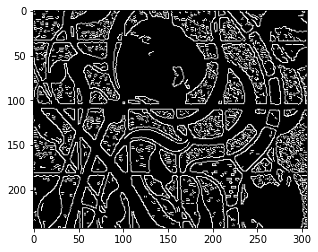

In [15]:
img_canny = cv2.Canny(img, 200, 300)
plt.imshow(img_canny, cmap='gray')

## Contour detection

We want to detect contours or outlines of subjects contained in an image or video frame -- **Regions of Interest**.

**Steps**
1.  Create a black image: `img = np.zeros(size, dtype=np.uint8)`

2.  Create a white rectangle in the image: `img[50:150, 50:150] = 255`

3.  Detect the contours in the image: `cv2.findContours(src image, retrieval mode, approximation mode)`.
    *   It returns a list of contours and their hierarchy in the image.

    *   `retrieval mode` is an algorithm to find contour within the image.

    *   `approximation mode` is an algorithm for reducing the number of points in a curve with a reduced set of points<br>
    <br>

4.  Convert the gray image to color to see the contours: `color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)`
5.  Draw contours using `cv2.drawContours(img, contour list, index of contours, color, thickness)`

[array([[[ 50,  50]],

       [[ 50, 149]],

       [[149, 149]],

       [[149,  50]]], dtype=int32)]


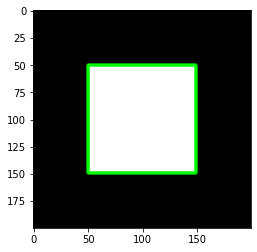

In [16]:
## Create a black image with white rectangle 
img = np.zeros((200, 200), dtype=np.uint8)
img[50:150, 50:150] = 255

## detect contours 
contours, hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

## draw contours on a colored image
color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
img = cv2.drawContours(color, contours, -1, (0,255,0), 2)

plt.imshow(img)
print(contours)

## Finding contours in irregular, skewed, and rotated shapes.

### Determining the bounding box of the subject

**Steps**
1.  Read the image.

2.  Convert the image to gray scale.

3.  Convert the image to binary image using `cv2.threshold(grayscale image, threshold value, max value, threshold style)`

4.  Detect the contours using `cv2.findContours(binary image, retrieval mode, approximation mode)`


5.  For each detected contour

    1.  Detect the bounding rectangle using `x, y, width, height = cv2.boundingRect(contour)`.

    2.  Draw the bounding rectangle using `cv2.rectangle(img, (x1, y1), (x2, y2), color, thickness)`.

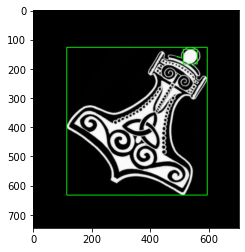

In [17]:
img = cv2.imread('./Images/hammer.PNG')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, img_bin = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

contours, hierarchy = cv2.findContours(img_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    img = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### Determining the minimum enclosing rectangle of the subject

**Steps**
1.  Read the image.

2.  Convert the image to gray scale.

3.  Convert the image to binary image using `cv2.threshold(grayscale image, threshold value, max value, threshold style)`

4.  Detect the contours using `cv2.findContours(binary image, retrieval mode, approximation mode)`

5.  For each detected contour

    1.  Find the minimum area rectangle using `rect = cv2.minAreaRect(contour)`.

    2.  Calculate coordinates of the minimum area rectangle using `box = cv2.boxPoints(rect)`.

    3.  Normalize coordinates to integers using `box = np.int0(box)`
    
    4.  Draw contours using `cv2.drawContours(img, [box], 0, (0,0, 255), 3)`

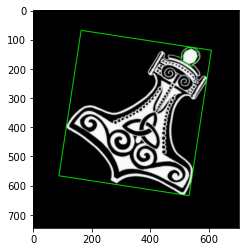

In [18]:
img = cv2.imread('./Images/hammer.PNG')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, img_bin = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

contours, hierarchy = cv2.findContours(img_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for c in contours:
    rect = cv2.minAreaRect(c)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    img = cv2.drawContours(img, [box], 0, (0, 255, 0), 2)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### Detecting the minimum enclosing circle

**Steps**
1.  Read the image.

2.  Convert the image to gray scale.

3.  Convert the image to binary image using `cv2.threshold(grayscale image, threshold value, max value, threshold style)`

4.  Detect the contours using `cv2.findContours(binary image, retrieval mode, approximation mode)`

5.  For each detected contour

    1.  Calculate center and radius of minimum enclosing circle: `(x, y), radius = cv2.minEnclosingCircle(c)`
    
    2.  Cast to integers: `center = (int(x), int(y))` and `radius = int(radius)`

    3.  Draw the circle: `img = cv2.circle(img, center, radius, (0, 255, 0), 2)`

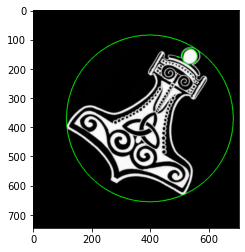

In [19]:
img = cv2.imread('./Images/hammer.PNG')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, img_bin = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

contours, hierarchy = cv2.findContours(img_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for c in contours:
    (x, y), radius = cv2.minEnclosingCircle(c)
    center = (int(x), int(y))
    radius = int(radius)
    img = cv2.circle(img, center, radius, (0, 255, 0), 2)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### Detecting the contours of the subject itself

**Steps**
1.  Read the image.

2.  Convert the image to gray scale.

3.  Convert the image to binary image using `cv2.threshold(grayscale image, threshold value, max value, threshold style)`

4.  Detect the contours using `cv2.findContours(binary image, retrieval mode, approximation mode)`

5. Draw the contours using `cv2.drawContours(src image, contours list, contour index, color, thickness)`

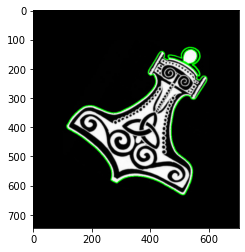

In [20]:
img = cv2.imread('./Images/hammer.PNG')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, img_bin = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

contours, hierarchy = cv2.findContours(img_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

img = cv2.drawContours(img, contours, -1, (0, 255, 0), 2)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### Drawing contours on a black image

**Steps**
1.  Read the image.

2.  Convert the image to gray scale.

3.  Convert the image to binary image using `cv2.threshold(grayscale image, threshold value, max value, threshold style)`

4.  Detect the contours using `cv2.findContours(binary image, retrieval mode, approximation mode)`

5.  Create a black image similar to the image itself: `np.zeros_like(img)`

6.  Draw the contour on the black image: `cv2.drawContours(src image, contours list, contour index, color, thickness)`

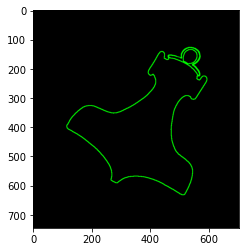

In [21]:
img = cv2.imread('./Images/hammer.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, img_bin = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

contours, hierarchy = cv2.findContours(img_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

black = np.zeros_like(img)

black = cv2.drawContours(black, contours, -1, (0, 255, 0), 2)

plt.imshow(black)

### Approximate bounding polygon of a shape

**Steps**
1.  Read the image.

2.  Convert the image to gray scale.

3.  Convert the image to binary image using `cv2.threshold(grayscale image, threshold value, max value, threshold style)`

4.  Detect the contours using `cv2.findContours(binary image, retrieval mode, approximation mode)`

5.  Create a black image similar to the image itself: `np.zeros_like(img)`

6.  For each detected contour:

    1.  Compute epsilon, which is the the maximum difference between the original contour and the approximated polygon: 
    
        `epsilon = ratio * cv2.arcLength(contour, closed polygon?)`
        
        `cv2.arcLength`: Calculates a contour perimeter or a curve length

    2.  Compute the approximated polygon: `approx = cv2.approxPolyDP(contour,epsilon,closed polygon?)`

    3.  Draw the approximated bounding polygon on the black image: `cv2.drawContours(src image, [approx], contour index, color, thickness)`

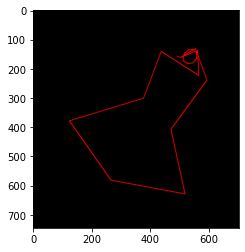

In [22]:
img = cv2.imread('./Images/hammer.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, img_bin = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

contours, hierarchy = cv2.findContours(img_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

black = np.zeros_like(img)

for c in contours:
    # try to change the ratio...
    epsilon = 0.02 * cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, epsilon, True)
    black = cv2.drawContours(black, [approx], -1, (255, 0, 0), 2)

plt.imshow(black)

### Detect convex hull

Here, `cv2.convexHull()` function checks a curve for convexity defects and corrects it.

<img src="./data/convx.png"  width="300" height="300">

**Steps**
1.  Read the image.

2.  Convert the image to gray scale.

3.  Convert the image to binary image using `cv2.threshold(grayscale image, threshold value, max value, threshold style)`

4.  Detect the contours using `cv2.findContours(binary image, retrieval mode, approximation mode)`

5.  Create a black image similar to the image itself: `np.zeros_like(img)`

6.  For each detected contour:

    1.  Compute the convex hull: `hull = cv2.convexHull(contour)`

    2.  Draw the contours on the black image: `cv2.drawContours(src image, hull, contour index, color, thickness)`    

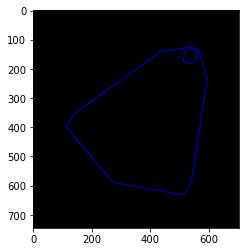

In [23]:
img = cv2.imread('./Images/hammer.png')
img_bin = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, img_bin = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

contours, hierarchy = cv2.findContours(img_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

black = np.zeros_like(img)

for c in contours:
    hull = cv2.convexHull(c)
    black = cv2.drawContours(black, [hull], -1, (0,0,255), 2)

plt.imshow(black)

### Detecting lines

**Steps**

1.  Read image: `img = cv2.imread(path to image)`

2.  Convert image to gray scale: `img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)`

3.  Detect the edges using Canny: `edges = cv2.Canny(image gray, min threshold, max threshold)`

4.  Detect lines using HoughLines function: `lines = cv2.HoughLinesP(edges of image, rho, theta, threshold, minLineLen, maxLineGap)`

    1.  `rho` is the positional step size in pixels, while `theta` is the rotational step size in radians. For example,
        if we specify `rho=1` and `theta=np.pi/180.0`, we search for lines that are separated by as little as 1 pixel and 1 degree.
    
    2.  `threshold`represents the threshold below which a line is discarded.

    3.  `minLineLen` minimum line length to search for.

    4.  `maxLineGap` space between the lines in the image.

5.  For each line detected:

    1.  Decompose line endpoints: `x1, y1, x2, y2 = line[0, 0], line[0, 1], line[0, 2], line[0, 3]`
    
    2.  Draw a line on the image: `cv2.line(img, (x1, y1), (x2, y2), color, thickness)`

(71, 1, 4)


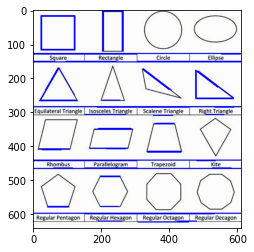

In [27]:
img = cv2.imread('./Images/shapes.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(img_gray, 50, 200)

minLineLen = 50
maxLineGap = 50
step_size = 1
rot_size = np.pi/180.0
thresh = 50

lines = cv2.HoughLinesP(edges, step_size, rot_size, thresh, minLineLen, maxLineGap)

print(lines.shape)
for line in lines:
    x1, y1, x2, y2 = line[0, 0], line[0, 1], line[0, 2], line[0, 3]
    cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 2)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)


### Detecting circles

**Steps**

1.  Read image: `img = cv2.imread(path to image)`

2.  Convert image to gray scale: `img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)`

3.  Blur the image using median blur filter: `img_gray_blur = cv2.medianBlur(img_gray, 5)`

4.  Detect lines using HoughCircles function: `circles = cv2.HoughCircles(gray image, method, dp, minDist, param1, param2, minRadius, maxRadius)`

    1.  `method`: Defines the method to detect circles in images. We will use `cv2.HOUGH_GRADIENT`.

    2.  `dp`: This parameter is the inverse ratio of the accumulator resolution to the image resolution. [https://stackoverflow.com/questions/33544411/in-the-circle-hough-transform-what-is-the-inverse-ratio-of-accumulator-resoluti]

    3.  `minDist`: Minimum distance between the center (x, y) coordinates of detected circles. If the minDist is too small, multiple circles in the same neighborhood as the original may be (falsely) detected. If the minDist is too large, then some circles may not be detected at all.

    4.  `param1`: Gradient value used to handle edge detection.

    5.  `param2`: Accumulator threshold value for the cv2.HOUGH_GRADIENT method. The smaller the threshold is, the more circles will be detected (including false circles). The larger the threshold is, the more circles will potentially be returned.

    6.  `minRadius`: Minimum size of the radius (in pixels).

    7.  `maxRadius`: Maximum size of the radius (in pixels).

5.  Convert the coordinates of the circles to integer values: `circles = np.uint16(np.around(circles))`

6.  For each circle detected:

    1.  Decompose line center and radius: `x1, y1, rad = circle[0, 0], c[0, 1], c[0, 2]`
    
    2.  Draw the outer circle on the image: `cv2.circle(img, (x1, y1), radius, color, thickness)`

    3.  Draw the center point on the image: `cv2.circle(img, (x1, y1), radius=2, color, thickness)`

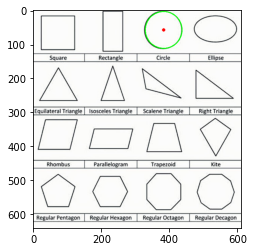

In [29]:
img = cv2.imread('./Images/shapes.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_gray_blur = cv2.medianBlur(img_gray, 5)

circles = cv2.HoughCircles(img_gray_blur, cv2.HOUGH_GRADIENT, 1, 20, param1=150, param2=100, minRadius=0, maxRadius=0)

circles = np.uint16(np.around(circles))

for c in circles:
    x1, y1, rad = c[0, 0], c[0, 1], c[0, 2]
    # Draw the outer circle
    cv2.circle(img, (x1, y1), rad, (0, 255, 0), 2)

    # Draw the center point
    cv2.circle(img, (x1, y1), 2, (0, 0, 255), 5)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img) 

## Exercise 

1.  Read the 'stone.jpg' image.

2.  Convert the image to gray scale.

3.  Apply the following filter to the gray scale image and the colored image.

$\left[\begin{array}{ccc}
0 & -1 & 0\\
-1 & 5 & -1\\
0 & -1 & 0
\end{array}\right]$

4.  Apply high-pass filter to the image.

5.  show the original and the processed images.

### Solution

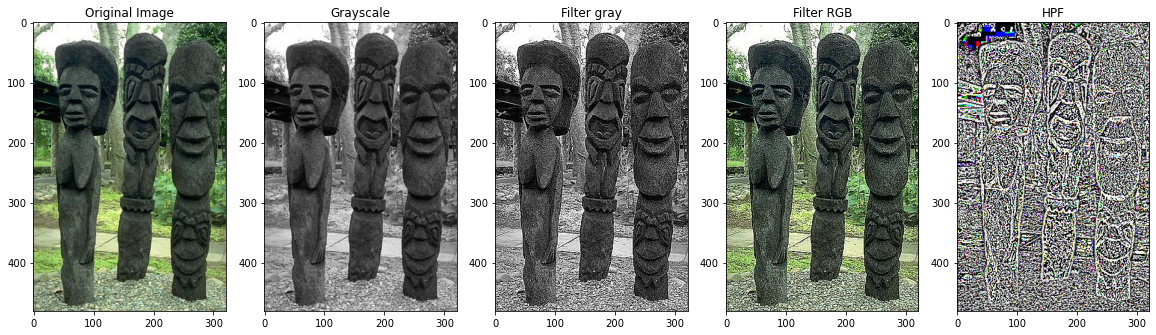

In [26]:
## Read an RGB image
img = cv2.imread('./Images/stone.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

## Convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

## Define the filter
filter = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

# filter_rgb = np.vstack([[filter_gray]] * 3)

## Apply the filter to grayscale and RGB images
img_filter_gray = cv2.filter2D(img_gray, ddepth=-1, kernel=filter)
img_filter_rgb = cv2.filter2D(img, ddepth=-1, kernel=filter)

## Apply HPF
hpf_img = img - cv2.GaussianBlur(img, (9, 9), 0)

## show the images
imgs = [img, img_gray, img_filter_gray, img_filter_rgb, hpf_img]
titles = ['Original Image', 'Grayscale', 'Filter gray', 'Filter RGB', 'HPF']

fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 20))
for i in range(5):
    ax = axs[i]
    if i==1 or i==2:
        ax.imshow(imgs[i], cmap='gray')
    else:
        ax.imshow(imgs[i])
    
    ax.set_title(titles[i])

plt.show()

# Task

Draw the contours, the approximated contours polygon, and convex hull of any image on one black image.

Similar to this

![](./data/task.PNG)